In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sktime.datasets import load_airline
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.pipeline import make_pipeline

In [2]:
def load_npy(filename):
    return np.load(filename)

In [3]:
import os
dir_path = 'time_series/'
len_threshold = 1280

# Prime 10 time series (random)

In [4]:
X, y, ids = [], [], []
genres = []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy': #loop su tutti i file 
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre
    genres.append(split)
    ts = load_npy(dir_path + file)
    
    if len(ts) > len_threshold: 
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation 
        ts = np.append(ts, pad) 

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids) #li salvo come numpy array

In [5]:
second_elements = [item[1] for item in genres]

unique_elements = list(set([element.replace('.npy', '') for element in second_elements]))
print(unique_elements)
len(unique_elements)

['piano', 'salsa', 'honky-tonk', 'sertanejo', 'folk', 'goth', 'songwriter', 'j-idol', 'minimal-techno', 'happy', 'synth-pop', 'kids', 'world-music', 'sleep', 'emo', 'progressive-house', 'heavy-metal', 'new-age', 'mpb', 'opera']


20

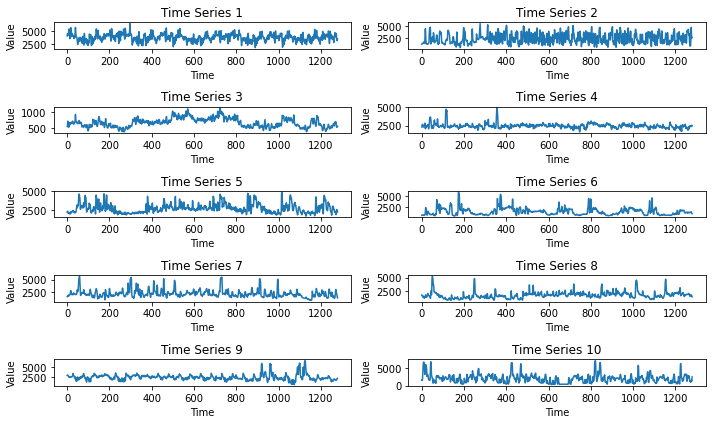

In [6]:
# Plot the first 10 time series
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(5, 2, i+1)  # 5 rows, 2 columns, i+1 is the plot index
    plt.plot(X[i][0])  # Assuming X is a list of lists where each inner list contains a single time series
    plt.title(f"Time Series {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Trasformazioni (amplitude scaling, noise)  win size= 50

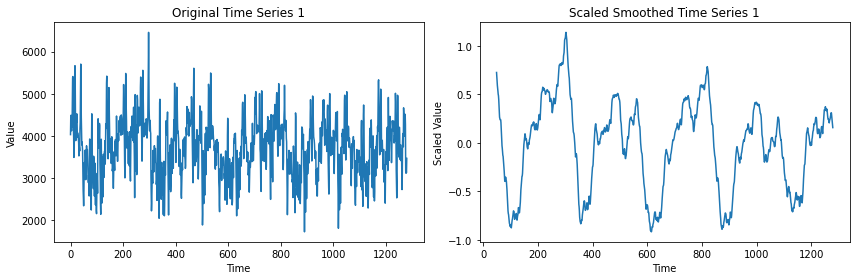

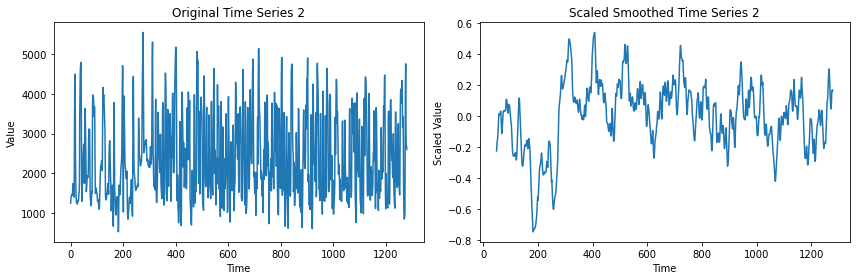

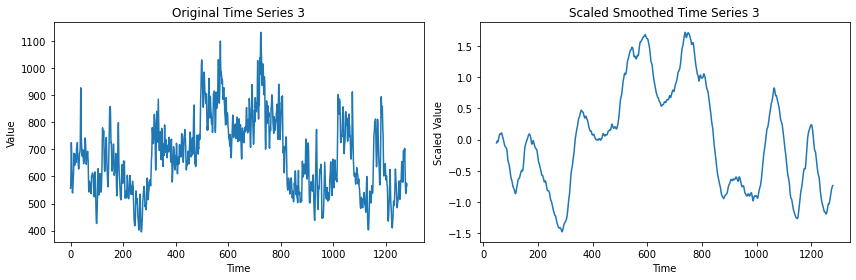

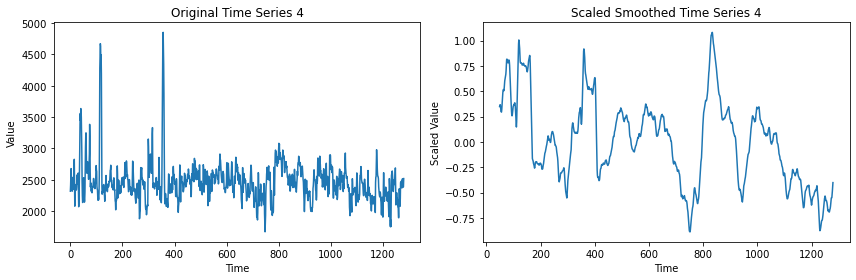

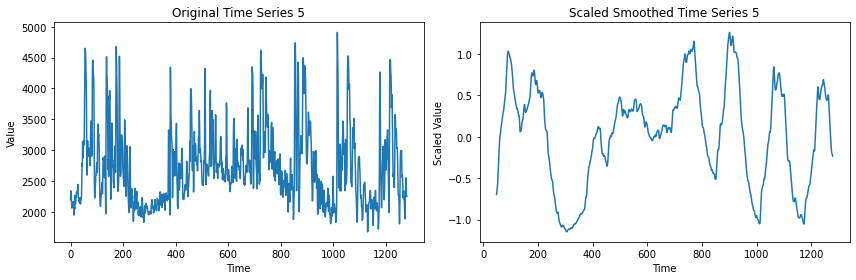

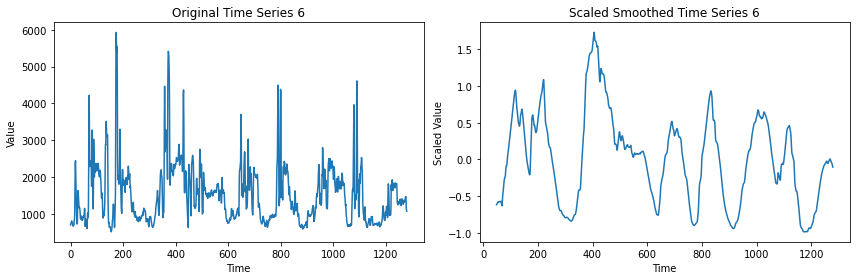

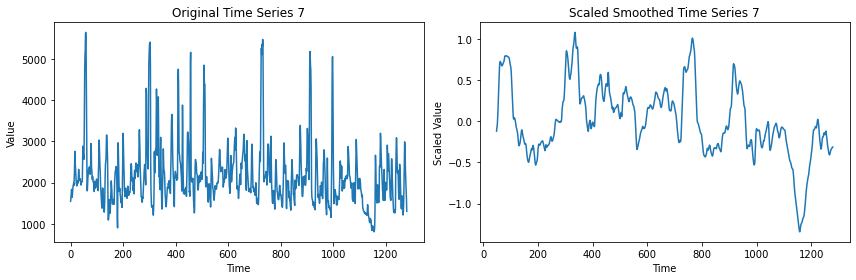

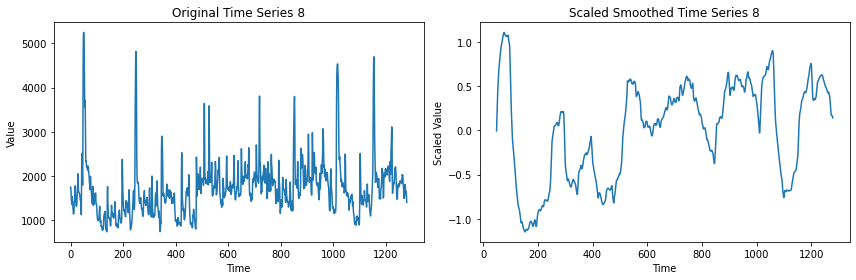

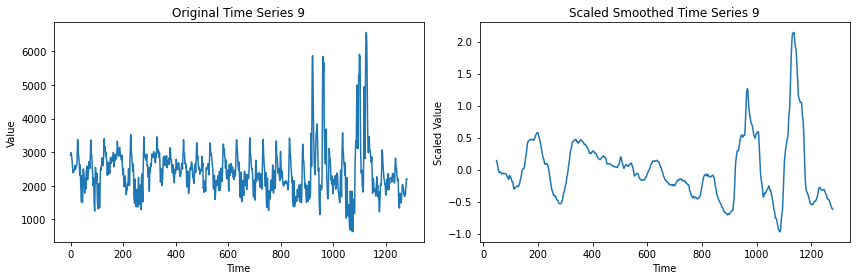

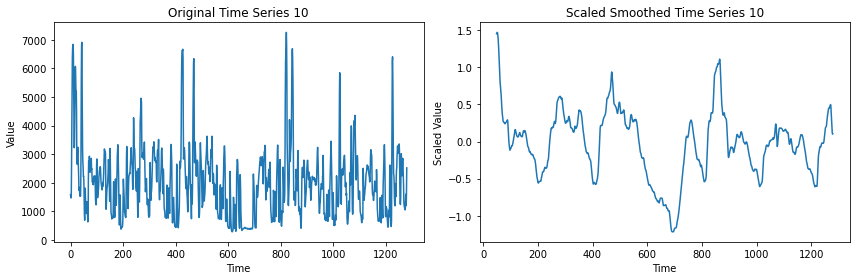

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define window size for rolling mean
w = 50

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot scaled and smoothed time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_smoothed)
    plt.xlabel("Time")
    plt.ylabel("Scaled Value")
    plt.title(f"Scaled Smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


# Trasformazioni (amplitude scaling, noise)  win size= 100

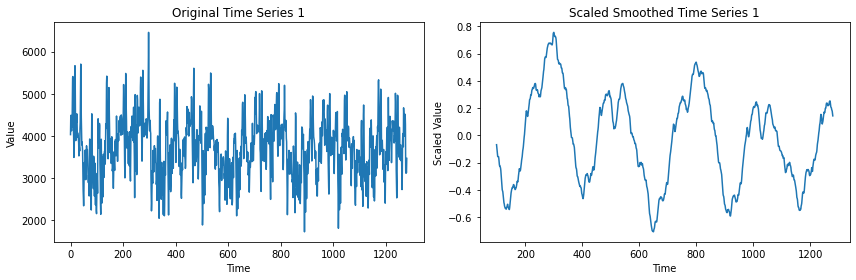

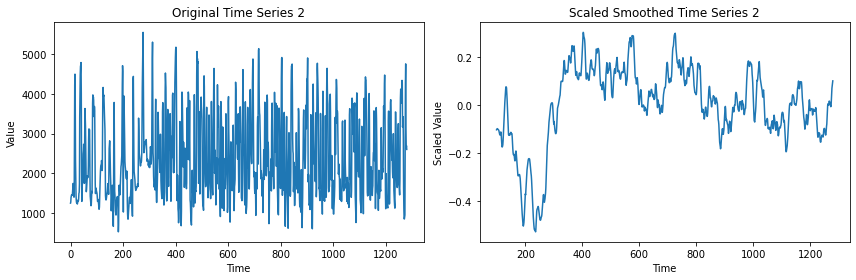

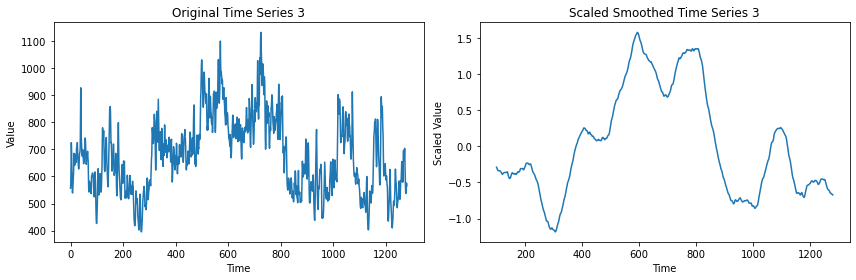

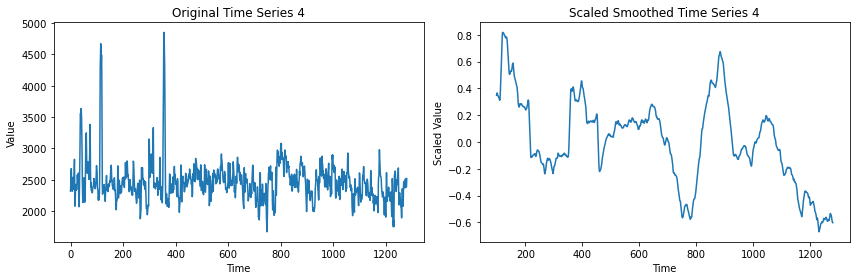

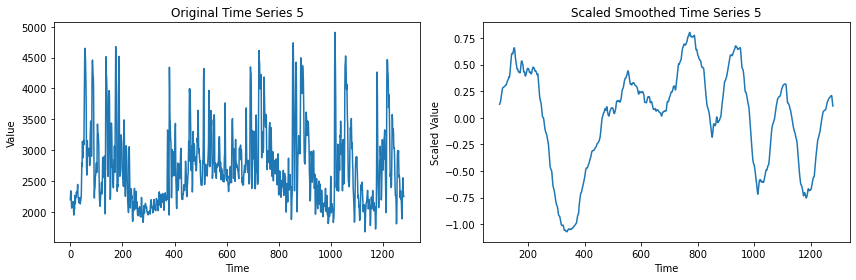

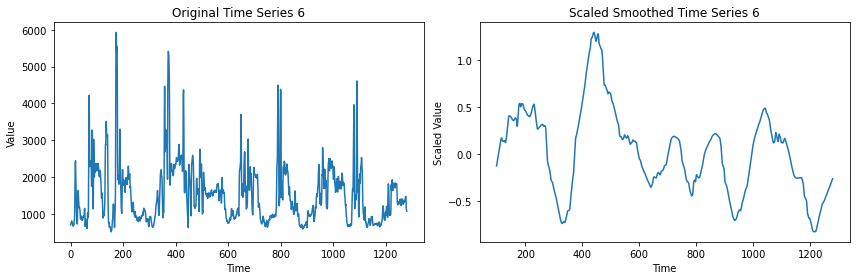

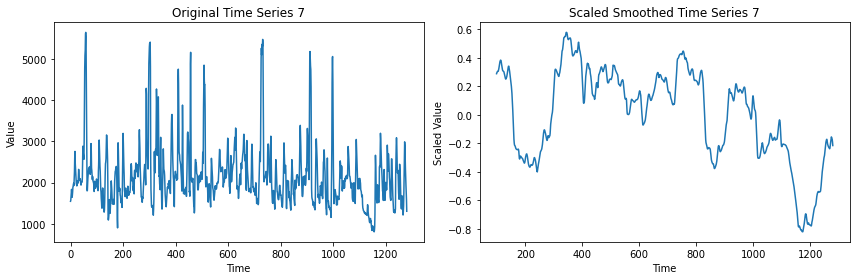

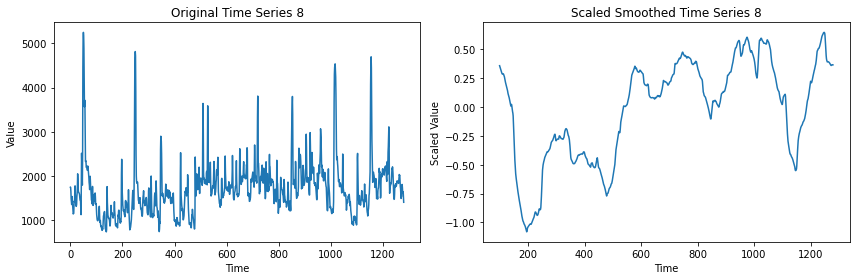

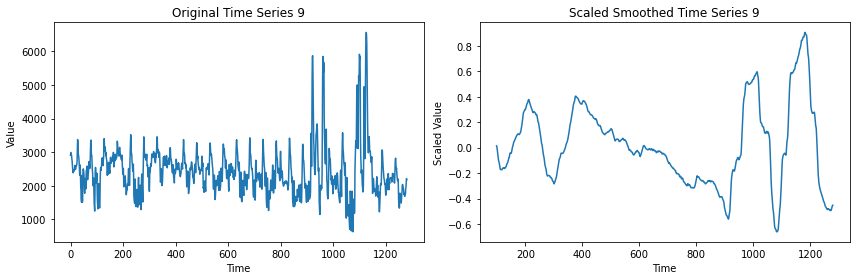

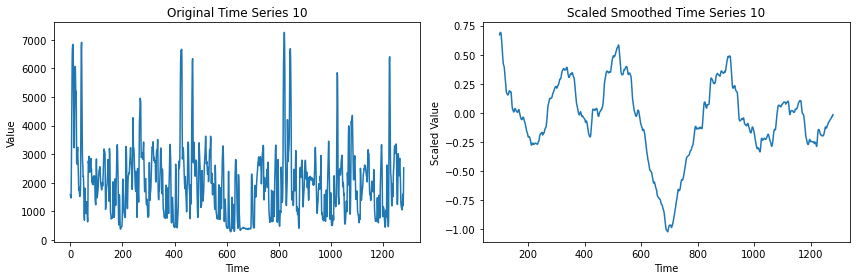

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define window size for rolling mean
w = 100

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot scaled and smoothed time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_smoothed)
    plt.xlabel("Time")
    plt.ylabel("Scaled Value")
    plt.title(f"Scaled Smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


In [9]:
from sktime.transformations.panel.dictionary_based import PAA

## Approssimazione (100 intervalli)

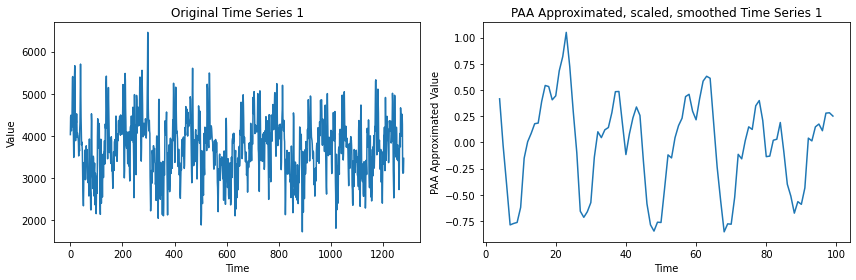

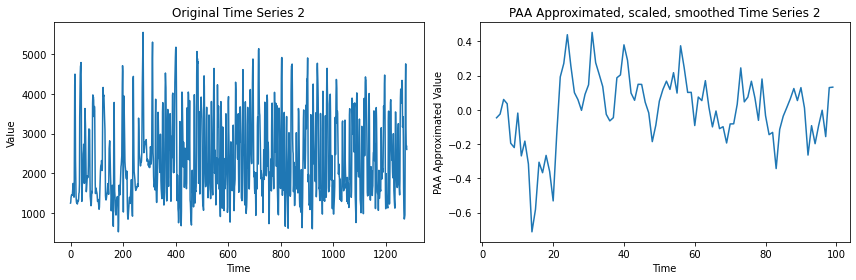

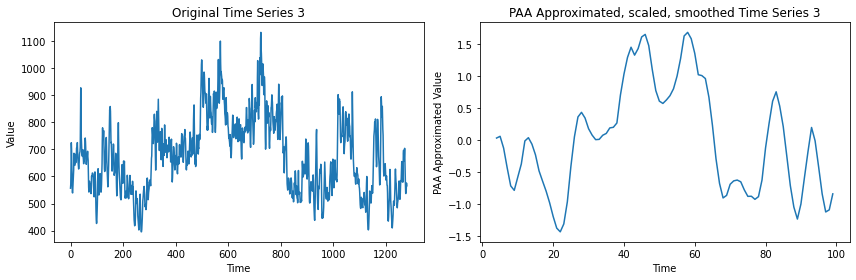

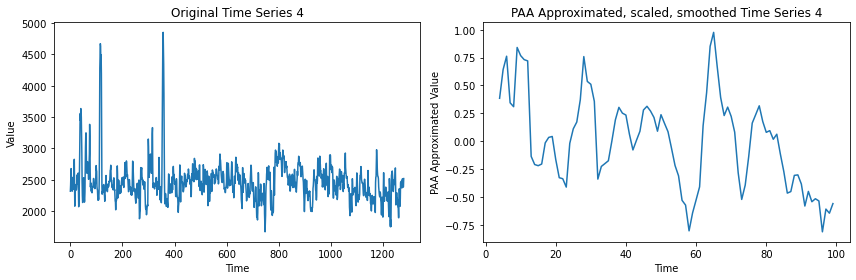

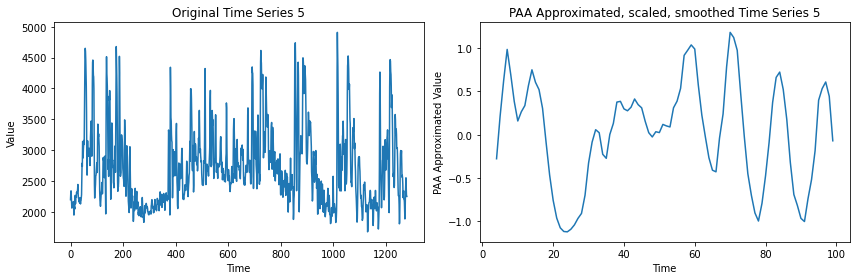

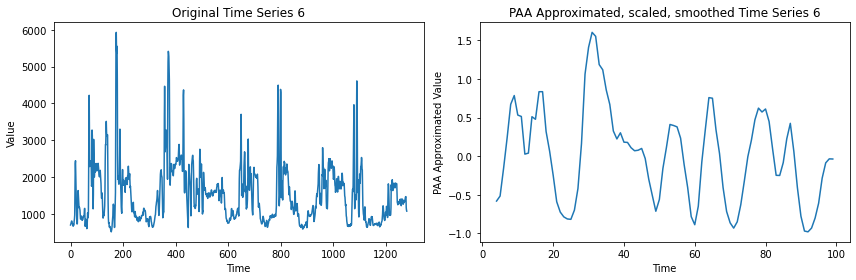

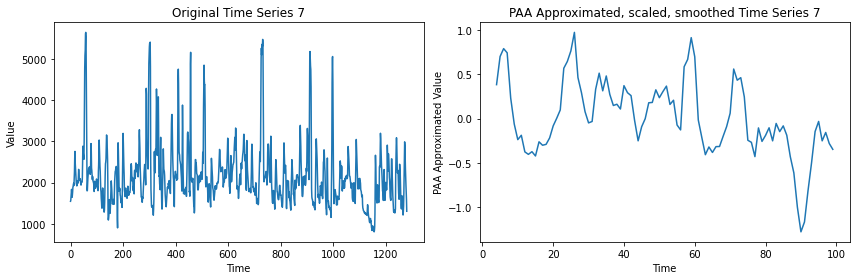

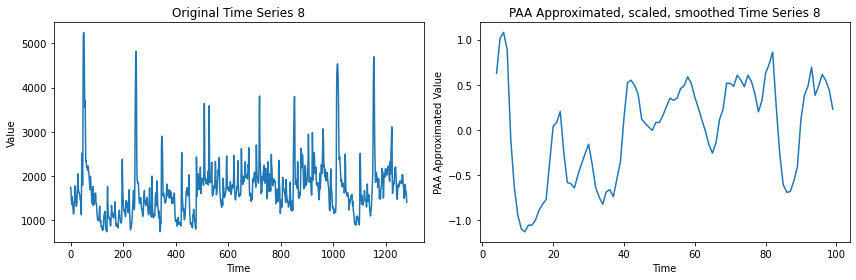

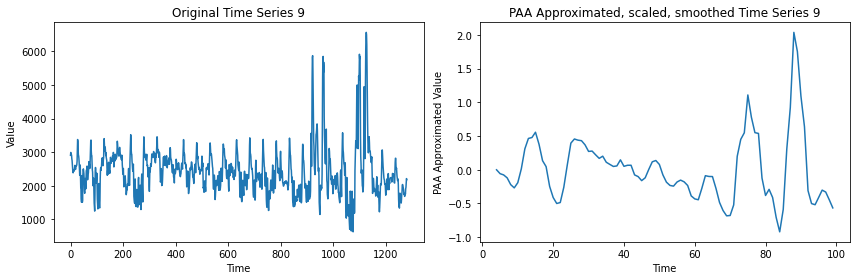

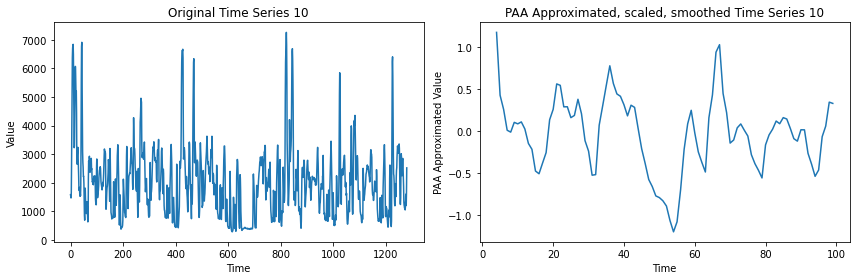

In [10]:
from sktime.transformations.panel.dictionary_based import PAA

# Define window size for rolling mean
w = 50

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization   (amplitude scaling)
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean     (noise)
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Perform Piecewise Aggregate Approximation (PAA)
    paa = PAA(num_intervals=100) # Piecewise Aggregate Approximation w. 100 intervals
    ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot PAA-approximated smoothed and scaled time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_paa)
    plt.xlabel("Time")
    plt.ylabel("PAA Approximated Value")
    plt.title(f"PAA Approximated, scaled, smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


## Approssimazione (50 intervalli)

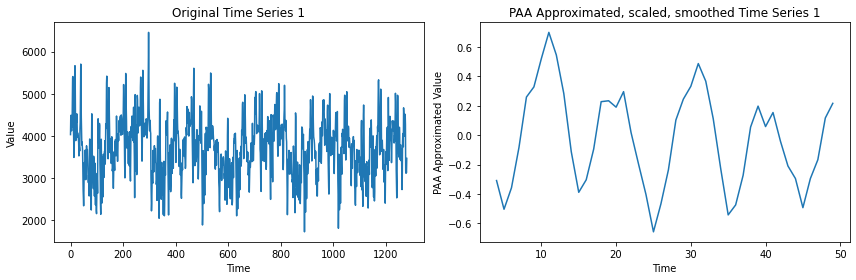

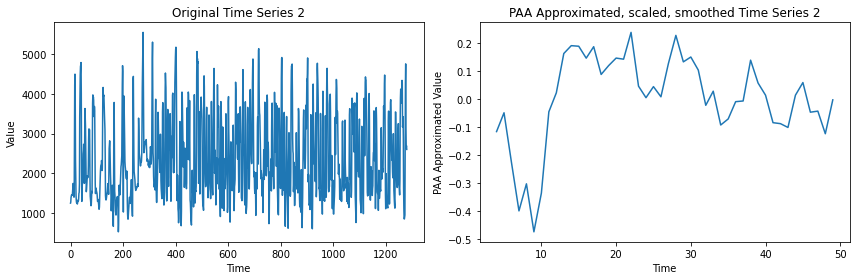

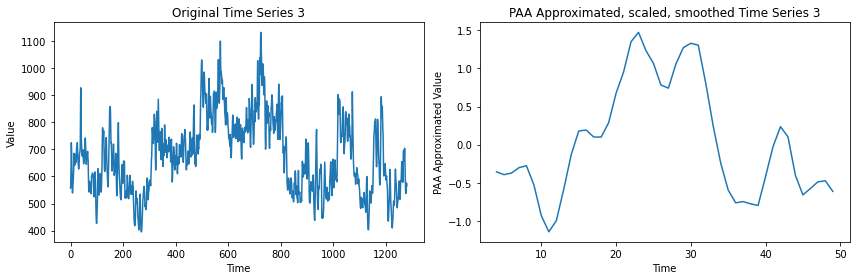

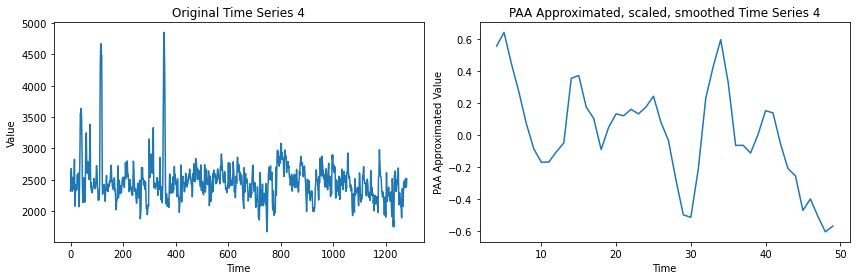

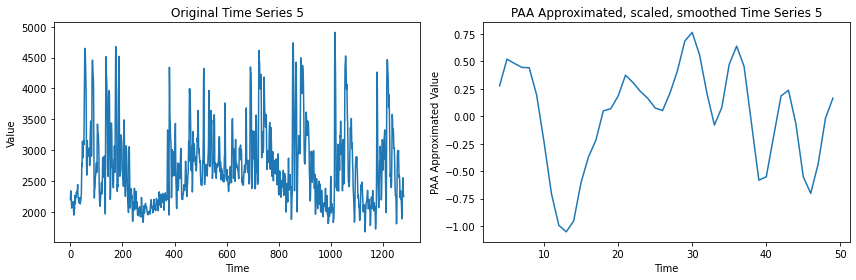

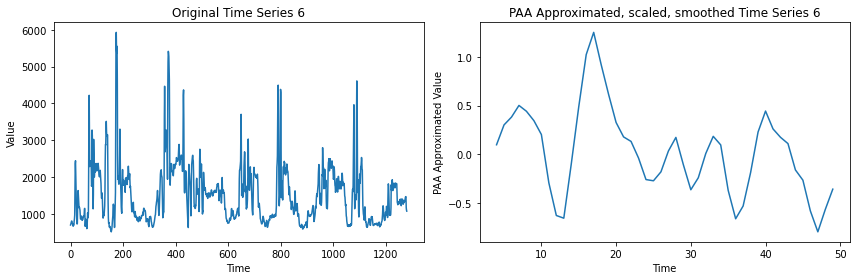

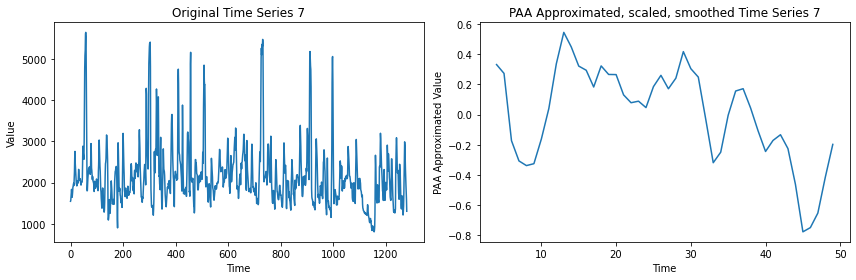

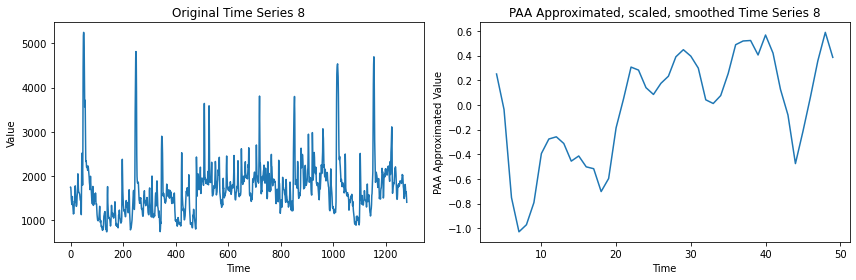

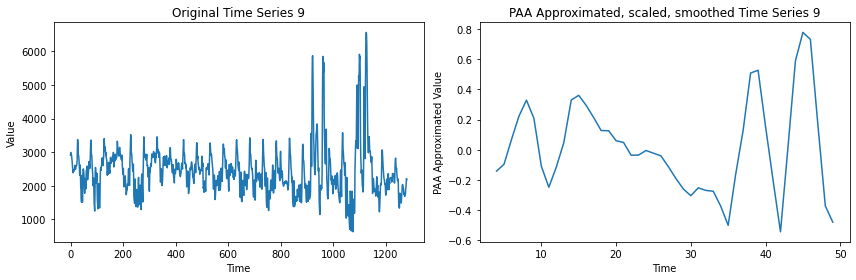

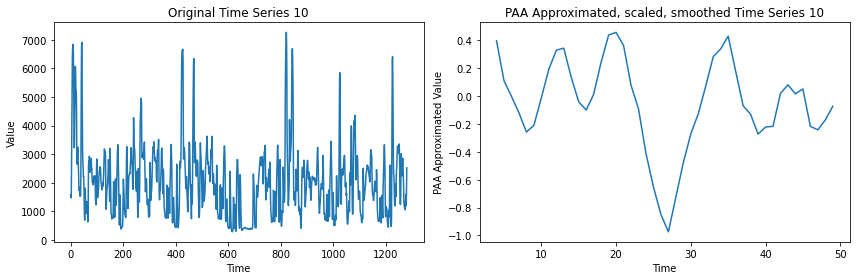

In [11]:
from sktime.transformations.panel.dictionary_based import PAA

# Define window size for rolling mean
w = 100

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization   (amplitude scaling)
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean     (noise)
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Perform Piecewise Aggregate Approximation (PAA)
    paa = PAA(num_intervals=50) # Piecewise Aggregate Approximation w. 100 intervals
    ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot PAA-approximated smoothed and scaled time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_paa)
    plt.xlabel("Time")
    plt.ylabel("PAA Approximated Value")
    plt.title(f"PAA Approximated, scaled, smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


# Noise removal reconstruct and MSE

In [26]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# Define your time series data in X

# Define window size for rolling mean
w_values = [5, 10, 100, 150, 180, 250]

original_series_list = []
scaled_series_list = []
smoothed_series_list = []
euclidean_distance_list = []

min_distance = float('inf')  # Initialize min_distance with infinity
best_w = None

for w in w_values:
    scaled_series_per_w = []  # List to store scaled series for the current window size
    smoothed_series_per_w = []  # List to store smoothed series for the current window size
    original_series_per_w = []  # List to store reconstructed series for the current window size
    
    distance_sum = 0
    for i in range(50):
        ts = X[i][0]  # Assuming X is a list of time series
        
        # Scale the time series
        scaler = StandardScaler()
        tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
        
        # Mean centering and standardization (amplitude scaling)
        ts_scaled = ((tss - tss.mean()) / tss.std())
        
        # Apply rolling window mean (noise)
        ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w, min_periods=1).mean()
            
        # Capture noise (difference between scaled and smoothed series)
        noise = ts_scaled.squeeze() - ts_smoothed
        
        # Reconstruct the original time series by adding back the noise
        original_series = ts_smoothed + noise

        # Append the current time series to the lists for the current window size
        scaled_series_per_w.append(ts_scaled)
        smoothed_series_per_w.append(ts_smoothed)
        original_series_per_w.append(original_series)

        
        # Calculate Euclidean distance between original and smoothed time series
        distance = pairwise_distances(ts_scaled.flatten().reshape(1, -1), np.array(original_series).flatten().reshape(1, -1), metric='euclidean')
        distance_sum += distance

    # Calculate average Euclidean distance for the current window size
    avg_distance = distance_sum / 50
    euclidean_distance_list.append(avg_distance)
    
    # Update min_distance and best_w if the current average distance is smaller than min_distance
    if avg_distance < min_distance:
        min_distance = avg_distance
        best_w = w
        
    # Append the lists for the current window size to the main lists
    scaled_series_list.append(scaled_series_per_w)
    smoothed_series_list.append(smoothed_series_per_w)
    original_series_list.append(original_series_per_w)

# Print best window size and corresponding minimum Euclidean distance
print("Best window size:", best_w)
print("Minimum Euclidean distance:", min_distance)


Best window size: 150
Minimum Euclidean distance: [[3.00686653e-07]]


In [27]:
# Find the index of the best window size in w_values
best_w_index = w_values.index(best_w)

# Select the lists corresponding to the best window size
best_scaled_series_list = scaled_series_list[best_w_index]
best_smoothed_series_list = smoothed_series_list[best_w_index]
best_original_series_list = original_series_list[best_w_index]

# Now you can use best_scaled_series_list, best_smoothed_series_list, and best_original_series_list
# for further analysis or visualization

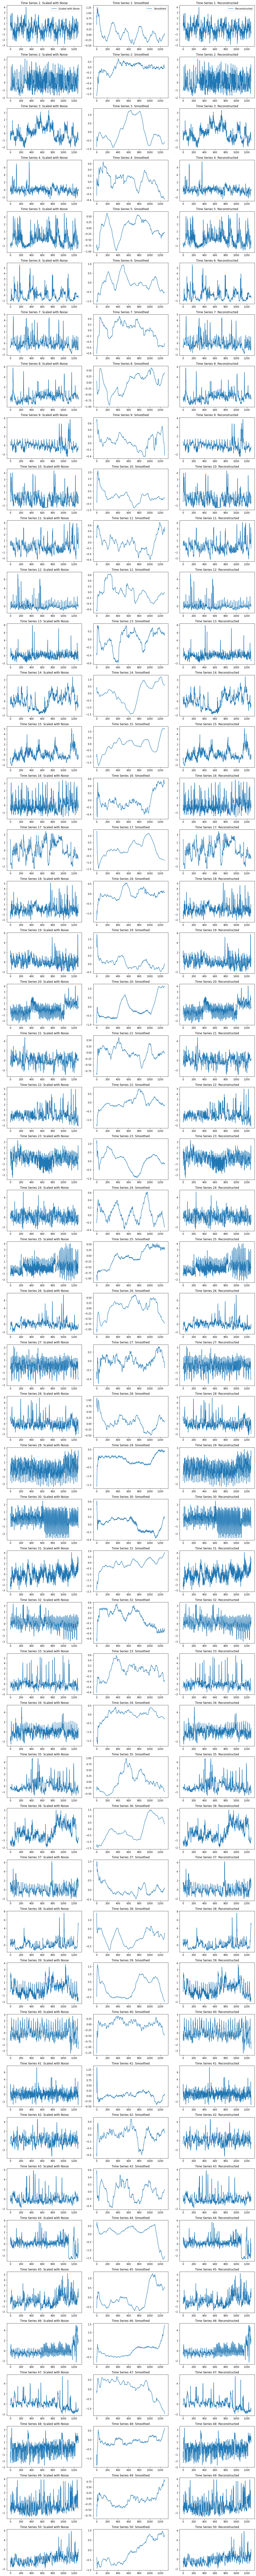

In [28]:
# Plot the scaled time series with noise and the reconstructed time series side by side
num_series_to_plot = (50)  # Plot at most 50 time series or the number available
num_plots = 3  # Three plots per time series: scaled with noise, smoothed, and reconstructed

if num_series_to_plot > 0:
    plt.figure(figsize=(15, num_series_to_plot*3))

    for i in range(num_series_to_plot):
        for j in range(num_plots):
            plt.subplot(num_series_to_plot, num_plots, i * num_plots + j + 1)
            if j == 0:
                plt.plot(best_scaled_series_list[i], label='Scaled with Noise')
                plt.title(f'Time Series {i+1}: Scaled with Noise')
            elif j == 1:
                plt.plot(best_smoothed_series_list[i], label='Smoothed')
                plt.title(f'Time Series {i+1}: Smoothed')
            else:
                plt.plot(best_original_series_list[i], label='Reconstructed')
                plt.title(f'Time Series {i+1}: Reconstructed')
            if i == 0:
                plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No time series available for plotting.")


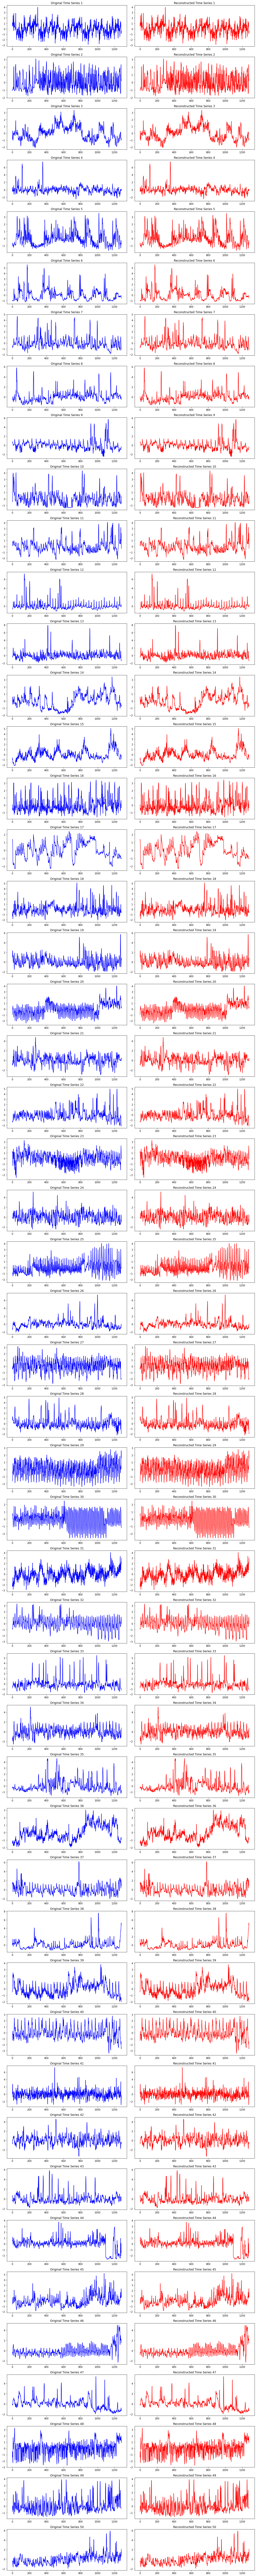

In [15]:
import matplotlib.pyplot as plt

# Assuming original_series_list contains the reconstructed original time series
# and X contains the original time series data

# Plotting the time series side by side
num_samples = 50  # Number of time series to plot

fig, axs = plt.subplots(num_samples, 2, figsize=(15, num_samples*3))

for i in range(num_samples):
    # Original time series
    axs[i, 0].plot(best_scaled_series_list[i], color='blue', label='Original')
    axs[i, 0].set_title('Original Time Series ' + str(i+1))
    
    # Reconstructed time series
    axs[i, 1].plot(best_original_series_list[i], color='red', label='Reconstructed')
    axs[i, 1].set_title('Reconstructed Time Series ' + str(i+1))

plt.tight_layout()
plt.show()


# PAA con w_best = 150

In [36]:
import numpy as np
import pandas as pd
from sktime.transformations.panel.dictionary_based import PAA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# Define window size for rolling mean
w = 150  # Best value from previous studies

# Define num_intervals values to search
num_intervals_values = [10, 50, 100, 150, 200]

# Initialize a list to store Euclidean distances
euclidean_distances = []

# Initialize scaler
scaler = StandardScaler()

for num_intervals in num_intervals_values:
    for i in range(10):
        ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series

        # Scale the time series
        tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))

        # Mean centering and standardization (amplitude scaling)
        ts_scaled = ((tss - tss.mean()) / tss.std())

        # Apply rolling window mean (noise)
        ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w, min_periods=1).mean()

        # Perform Piecewise Aggregate Approximation (PAA)
        paa = PAA(num_intervals=num_intervals)
        ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values

        # Invert PAA transformation
        inverse_paa = np.repeat(ts_paa, len(ts_smoothed) // len(ts_paa))

        # Invert scaling transformation
        reconstructed_series = inverse_paa * tss.std() + tss.mean()

        # Interpolate reconstructed series to match the length of original series
        reconstructed_series_interp = np.interp(np.arange(len(ts)), np.arange(len(reconstructed_series)), reconstructed_series)

        # Calculate Euclidean distance between original and reconstructed time series
        distance = euclidean(ts, reconstructed_series_interp)
        euclidean_distances.append(distance)

# Find the best num_intervals that minimizes Euclidean distance
best_num_intervals = num_intervals_values[np.argmin(euclidean_distances)]

print("Best num_intervals:", best_num_intervals)
print("Minimum Euclidean distance:", min(euclidean_distances))


Best num_intervals: 100
Minimum Euclidean distance: 24681.780752703275


In [39]:

w=150
best_intervals=100
ts_paa_list = []

for i in range(10000):
        ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series

        # Scale the time series
        tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))

        # Mean centering and standardization (amplitude scaling)
        ts_scaled = ((tss - tss.mean()) / tss.std())

        # Apply rolling window mean (noise)
        ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w, min_periods=1).mean()

        # Perform Piecewise Aggregate Approximation (PAA)
        paa = PAA(num_intervals=best_intervals)
        ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values
        ts_paa_list.append([ts_paa])

# Clustering DTW

In [40]:
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.utils.plotting import plot_series

In [75]:
clusterer = TimeSeriesKMeans(n_clusters=3, metric="dtw", distance_params={"itakura_max_slope": 1.0})

In [74]:
len(ts_paa_list)

10000

In [43]:
ts_paa_vect = np.array(ts_paa_list)

In [45]:
ts_paa_vect.shape

(10000, 1, 100)

In [76]:
clusterer

TimeSeriesKMeans(distance_params={'itakura_max_slope': 1.0}, n_clusters=3)

In [65]:
x_train = ts_paa_vect

In [77]:
len(x_train)

10000

In [49]:
y_train = ts_paa_vect[0][0]

In [50]:
y_train.shape

(100,)

In [78]:
%%time
clusterer.fit(x_train)

In [68]:
df = pd.DataFrame(np.squeeze(x_train))
df["cluster"] = clusterer.labels_
df.head()

0         1         2         3         4         5         6  \
0  0.932631  1.085709  0.938462  0.853384  0.508171  0.305165  0.129727   
1 -0.956458 -0.542278 -0.554500 -0.237225 -0.166849 -0.164022 -0.178701   
2 -0.521587 -0.394016 -0.236718 -0.072974 -0.042981 -0.065848 -0.165853   
3 -0.085872 -0.075685 -0.095785  0.348066  0.321419  0.425583  0.429340   
4 -0.831735 -0.933980 -0.856064 -0.789621 -0.370661 -0.125088  0.024922   

          7         8         9  ...        91        92        93        94  \
0 -0.010412 -0.091773 -0.145410  ... -0.296286 -0.158085 -0.230865 -0.296161   
1 -0.088938 -0.176822 -0.187004  ... -0.077343 -0.077177 -0.021862 -0.015454   
2 -0.254938 -0.350244 -0.368472  ... -0.205382 -0.262279 -0.302242 -0.439879   
3  0.357053  0.319508  0.601068  ... -0.324798 -0.300550 -0.380862 -0.473673   
4  0.143125  0.146552  0.090181  ... -0.237590 -0.247533 -0.283047 -0.371534   

         95        96        97        98        99  cluster  
0 -0.252021 -0.163997 -0.089335 -0.048608  0.020939        0  
1 -0.007769 -0.049098 -0.064309  0.027570 -0.004320        1  
2 -0.588655 -0.689171 -0.721375 -0.688488 -0.610974        1  
3 -0.511611 -0.521003 -0.490265 -0.524751 -0.566497        0  
4 -0.320842 -0.305481 -0.246158 -0.222489 -0.204771        1  

[5 rows x 101 columns]

In [69]:
df

0         1         2         3         4         5         6  \
0     0.932631  1.085709  0.938462  0.853384  0.508171  0.305165  0.129727   
1    -0.956458 -0.542278 -0.554500 -0.237225 -0.166849 -0.164022 -0.178701   
2    -0.521587 -0.394016 -0.236718 -0.072974 -0.042981 -0.065848 -0.165853   
3    -0.085872 -0.075685 -0.095785  0.348066  0.321419  0.425583  0.429340   
4    -0.831735 -0.933980 -0.856064 -0.789621 -0.370661 -0.125088  0.024922   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.502753 -0.443889  0.017447  0.024041 -0.153825 -0.196433 -0.205162   
9996  0.068992 -0.447434 -0.818529 -0.700689 -0.657197 -0.759398 -0.883428   
9997  0.064563  0.366106  0.647109  0.990835  0.980199  0.852442  0.660623   
9998 -1.779434 -1.393835 -1.341993 -1.209972 -1.103692 -1.072307 -1.061056   
9999 -0.444423 -0.920139 -0.930467 -1.075614 -1.179824 -1.151025 -1.064835   

             7         8         9  ...        91        92        93  \
0    -0.010412 -0.091773 -0.145410  ... -0.296286 -0.158085 -0.230865   
1    -0.088938 -0.176822 -0.187004  ... -0.077343 -0.077177 -0.021862   
2    -0.254938 -0.350244 -0.368472  ... -0.205382 -0.262279 -0.302242   
3     0.357053  0.319508  0.601068  ... -0.324798 -0.300550 -0.380862   
4     0.143125  0.146552  0.090181  ... -0.237590 -0.247533 -0.283047   
...        ...       ...       ...  ...       ...       ...       ...   
9995 -0.094239 -0.131914 -0.108605  ...  0.352239  0.364092  0.301545   
9996 -0.907408 -0.859071 -0.852946  ...  0.859789  0.772542  0.712782   
9997  0.595820  0.631397  0.610890  ...  0.146661  0.127851  0.160479   
9998 -1.092497 -1.097682 -1.119913  ...  0.931833  0.963740  0.928949   
9999 -0.961032 -0.988713 -0.855362  ...  0.160405 -0.115092 -0.261872   

            94        95        96        97        98        99  cluster  
0    -0.296161 -0.252021 -0.163997 -0.089335 -0.048608  0.020939        0  
1    -0.015454 -0.007769 -0.049098 -0.064309  0.027570 -0.004320        1  
2    -0.439879 -0.588655 -0.689171 -0.721375 -0.688488 -0.610974        1  
3    -0.473673 -0.511611 -0.521003 -0.490265 -0.524751 -0.566497        0  
4    -0.371534 -0.320842 -0.305481 -0.246158 -0.222489 -0.204771        1  
...        ...       ...       ...       ...       ...       ...      ...  
9995  0.263173  0.322603  0.298548  0.253441  0.221801  0.287332        1  
9996  0.656883  0.695428  0.744616  0.751572  0.635105  0.473611        1  
9997  0.233427  0.249760  0.288826  0.358865  0.309179  0.401637        0  
9998  0.865514  0.653830  0.396272  0.018035 -0.280724 -0.517783        1  
9999 -0.343323 -0.368708 -0.318327 -0.195961 -0.108218 -0.041426        1  

[10000 rows x 101 columns]

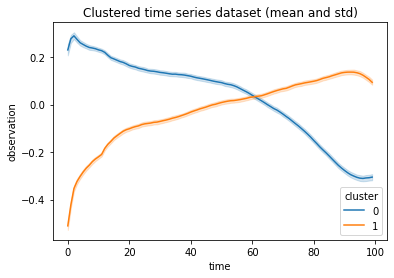

In [70]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

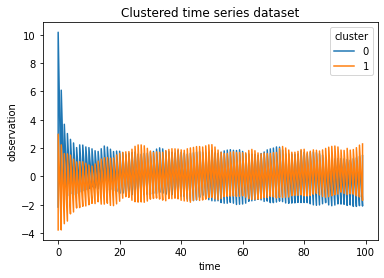

In [71]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

In [55]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

ValueError: Length of values (100) does not match length of index (1000)